# MSDS 400 Normal Distribution

In [1]:
from numpy import linspace, math
import matplotlib.pyplot as plt

This particular module takes a few seconds to load.  Be patient. Using the
NumPy math library does speed things up somewhat.  When the prompt asks for a
value, enter it and a plot will appear.

The program will ask for a user supplied value to be entered at the prompt.
The integration will use the standard normal density function to find the
probability that a standard normal random variable will be <= the value
specified by the user  A plot will show the area integrated, the user
supplied value and the area under the curve.

In [2]:
# This is the density function for a standard normal distribution.
def f(inp):
    return (math.exp(-inp * inp / 2)) / math.sqrt(2.0 * math.pi)

# Simpson's rule is used to integrate over [a,b].
def integrate(a, b, delta):  
    total = 0.0
    i = 0
    n = int(float((b - a) / delta))
    if b == a:
        return
    else:
        while i < n:
            x0 = a + delta * i
            x1 = x0 + delta / 2
            x2 = x0 + delta
            total = total + delta * (f(x0) + 4.0 * f(x1) + f(x2)) / 6
            i = i + 1
        return total

The following values determine the total interval considered and also
the increment used for numerical integration.  We are dividing 12 standard
deviations into 1200 subintervals thus defining delta.

Value of the variable x for integration=?5
Area with x= 5.0 equals 1.0


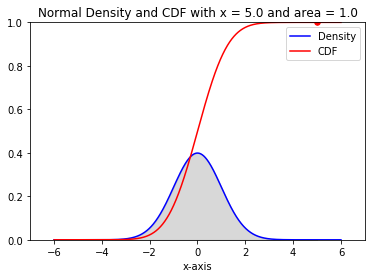

In [3]:
xa = -6.0
xb = 6.0
num = 1200
delta_calc = float((xb - xa) / num)

x = linspace(xa, xb, num)
y = []
cdf = []

for z in x:
    y = y + [f(z)]
    cdf = cdf + [integrate(xa, z, delta_calc)]

value = float(input('Value of the variable x for integration?'))

fvalue = integrate(-6, value, delta_calc)
fvalue = round(fvalue, 4)
print('Area with x= {} equals {}'.format(value, fvalue))

plt.xlim(xa - 1, xb + 1)
plt.ylim(0, 1)

string = ' with x = ' + str(value) + ' and area = ' + str(fvalue)
plt.title('Normal Density and CDF with x = {} and area = {}'.format(value, fvalue))
plt.xlabel('x-axis')

plt.plot(x, y, 'b', label='Density')
plt.plot(x, cdf, 'r', label='CDF')
plt.legend()

plt.fill_between(x, y, where=(x <= value), color='grey', alpha='0.3')
plt.scatter(value, fvalue, s=30, c='r', marker='o')
plt.show()